# Stellar Mass Table distribution fit
*Parse table from csv file*

In [164]:
from pandas import read_csv


df = read_csv('stellar_orbital_eccentricity.csv')
df.head()

,eccentricity,p,p_moderate,p_close,p_very_close
0,0.95,0.00463,0.000000,0.000000,0.00000
1,0.90,0.01389,0.000000,0.000000,0.00000
2,0.80,0.02778,0.004630,0.000000,0.00000
3,0.70,0.11574,0.041667,0.004630,0.00000
4,0.60,0.21296,0.115741,0.041667,0.00463


## Discrete probabilities
*the p column contains probability of the dice rolls corresponding to the eccentricities*

In [165]:
x = df.eccentricity
y = df.p

y.sum()

1.0

*creating random sample of 1000 elements from given probabilities*

In [166]:
from random import choices

sample = choices(list(x), weights=list(y), k=1000)


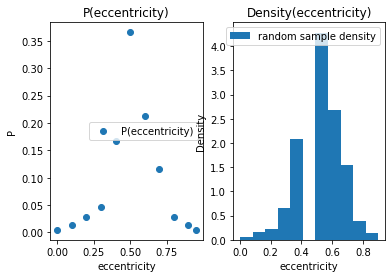

In [167]:
import matplotlib.pyplot as plt


_, axs = plt.subplots(1, 2)
axs[0].set_title(r"P(eccentricity)")
axs[0].plot(x, y, 'o', label='P(eccentricity)')
axs[0].set_xlabel('eccentricity')
axs[0].set_ylabel('P')
axs[0].legend()
axs[1].set_title(r"Density(eccentricity)")
axs[1].hist(sample, density=True, bins=len(x), label='random sample density')
axs[1].set_xlabel('eccentricity')
axs[1].set_ylabel('Density')
axs[1].legend()

plt.show()

## Continuous random variable fit
*Fitting a truncated normal distribution to the random sample*

In [168]:

import numpy as np

xa, xb = x.min(), x.max()
mu = np.mean(sample)
sigma = np.std(sample)
a, b = (xa - mu) / sigma, (xb - mu) / sigma

a, b, mu, sigma 

(-3.639448553919652, 3.0057102510460783, 0.5203, 0.14296121851747065)

In [169]:
from scipy.stats import truncnorm
from scipy.stats import kstest

dist = truncnorm(a, b, mu, sigma)
r = kstest(sample, [a, b, mu, sigma], 'truncnorm')
r

KstestResult(statistic=0.482, pvalue=0.22261436530807233)

*Density function from the fitted continuous random variable*

In [170]:
y_pdf =  [dist.pdf(xi) for xi in x]

*Creating random sample of 1000 elements from the fitted continuous random variable*

In [171]:
fit_sample = dist.rvs(size=1000)

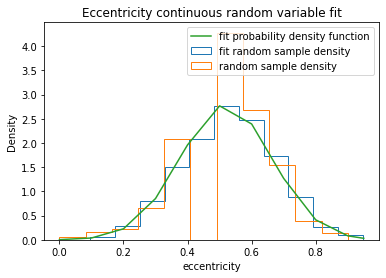

In [172]:
_, ax = plt.subplots()
ax.set_title(r"Eccentricity continuous random variable fit")
ax.hist(fit_sample, density=True, histtype='step', bins=len(x), label='fit random sample density')
ax.hist(sample, density=True, histtype='step', bins=len(x), label='random sample density')
ax.plot(x, y_pdf, '-', label='fit probability density function')
ax.set_xlabel('eccentricity')
ax.set_ylabel('Density')
ax.legend()
plt.show()

*All generated values in sample must be in interval [0, .95]*

In [173]:
all(v >= x.min() and v <= x.max() for v in fit_sample)

True

## Discrete probabilities with modifiers
*the p_moderate, p_close and p_very_close columns contains modified probability of the dice rolls corresponding to the eccentricities given a separation category*

### Moderate separation modifier

In [174]:
x_moderate = df.eccentricity[df.p_moderate > 0]
y_moderate = df.p_moderate[df.p_moderate > 0]

y_moderate.sum()

1.0

*creating random sample of 1000 elements from given probabilities*

In [175]:
sample_moderate = choices(list(x_moderate), weights=list(y_moderate), k=1000)

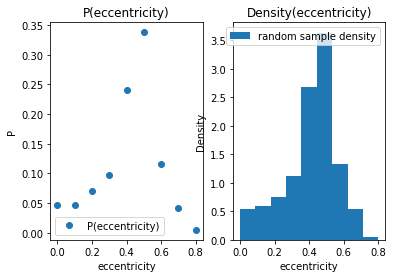

In [176]:
_, axs = plt.subplots(1, 2)
axs[0].set_title(r"P(eccentricity)")
axs[0].plot(x_moderate, y_moderate, 'o', label='P(eccentricity)')
axs[0].set_xlabel('eccentricity')
axs[0].set_ylabel('P')
axs[0].legend()
axs[1].set_title(r"Density(eccentricity)")
axs[1].hist(sample_moderate, density=True, bins=len(x_moderate), label='random sample density')
axs[1].set_xlabel('eccentricity')
axs[1].set_ylabel('Density')
axs[1].legend()

### Close separation modifier

In [177]:
x_close = df.eccentricity[df.p_close > 0]
y_close = df.p_close[df.p_close > 0]

y_close.sum()

1.0

*creating random sample of 1000 elements from given probabilities*

In [178]:
sample_close = choices(list(x_close), weights=list(y_close), k=1000)

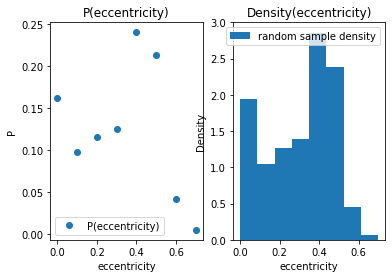

In [179]:
_, axs = plt.subplots(1, 2)
axs[0].set_title(r"P(eccentricity)")
axs[0].plot(x_close, y_close, 'o', label='P(eccentricity)')
axs[0].set_xlabel('eccentricity')
axs[0].set_ylabel('P')
axs[0].legend()
axs[1].set_title(r"Density(eccentricity)")
axs[1].hist(sample_close, density=True, bins=len(x_close), label='random sample density')
axs[1].set_xlabel('eccentricity')
axs[1].set_ylabel('Density')
axs[1].legend()

### Very close separation modifier

In [180]:
x_very_close = df.eccentricity[df.p_very_close > 0]
y_very_close = df.p_very_close[df.p_very_close > 0]

y_very_close.sum()

1.00000000029646

*creating random sample of 1000 elements from given probabilities*

In [181]:
sample_very_close = choices(list(x_very_close), weights=list(y_very_close), k=1000)

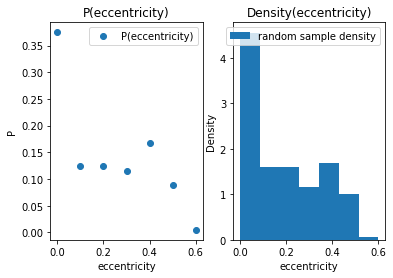

In [182]:
_, axs = plt.subplots(1, 2)
axs[0].set_title(r"P(eccentricity)")
axs[0].plot(x_very_close, y_very_close, 'o', label='P(eccentricity)')
axs[0].set_xlabel('eccentricity')
axs[0].set_ylabel('P')
axs[0].legend()
axs[1].set_title(r"Density(eccentricity)")
axs[1].hist(sample_very_close, density=True, bins=len(x_very_close), label='random sample density')
axs[1].set_xlabel('eccentricity')
axs[1].set_ylabel('Density')
axs[1].legend()

## Continuous random variable fit on modified probabilities
*Fitting distributions to the random samples*

### Moderate separation modifier
*Fitting a truncated normal distribution*

In [183]:
xa, xb = x_moderate.min(), x_moderate.max()
mu = np.mean(sample_moderate)
sigma = np.std(sample_moderate)
a, b = (xa - mu) / sigma, (xb - mu) / sigma

a, b, mu, sigma 

(-2.438245840186476, 2.2676568670491837, 0.4145, 0.16999926470429216)

In [184]:
dist_moderate = truncnorm(a, b, mu, sigma)
r = kstest(sample_moderate, [a, b, mu, sigma], 'truncnorm')
r

KstestResult(statistic=0.4, pvalue=0.44092082902411933)

*Density function from the fitted continuous random variable*

In [185]:
y_moderate_pdf =  [dist_moderate.pdf(xi) for xi in x_moderate]

*Creating random sample of 1000 elements from the fitted continuous random variable*

In [186]:
fit_sample_moderate = dist_moderate.rvs(size=1000)

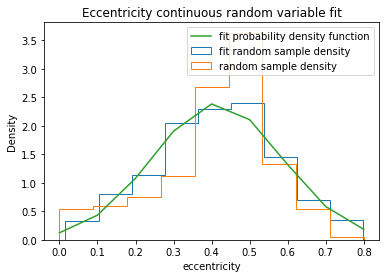

In [187]:
_, ax = plt.subplots()
ax.set_title(r"""Eccentricity continuous random variable fit
with moderate separation""")
ax.hist(fit_sample_moderate, density=True, histtype='step', bins=len(x_moderate), label='fit random sample density')
ax.hist(sample_moderate, density=True, histtype='step', bins=len(x_moderate), label='random sample density')
ax.plot(x_moderate, y_moderate_pdf, '-', label='fit probability density function')
ax.set_xlabel('eccentricity')
ax.set_ylabel('Density')
ax.legend()
plt.show()

*All generated values in sample must be in interval [0, .8]*

In [188]:
all(v >= x_moderate.min() and v <= x_moderate.max() for v in fit_sample_moderate)

True

### Close separation modifier
*Fitting a truncated normal distribution*

In [189]:
xa, xb = x_close.min(), x_close.max()
mu = np.mean(sample_close)
sigma = np.std(sample_close)
a, b = (xa - mu) / sigma, (xb - mu) / sigma

a, b, mu, sigma

(-1.5957361671166594, 2.1189805504811505, 0.3007, 0.1884396720438666)

In [190]:
dist_close = truncnorm(a, b, mu, sigma)
r = kstest(sample_close, [a, b, mu, sigma], 'truncnorm')
r

KstestResult(statistic=0.255, pvalue=0.8965220738215802)

*Density function from the fitted continuous random variable*

In [191]:
y_close_pdf =  [dist_close.pdf(xi) for xi in x_close]

*Creating random sample of 1000 elements from the fitted continuous random variable*

In [192]:
fit_sample_close = dist_close.rvs(size=1000)

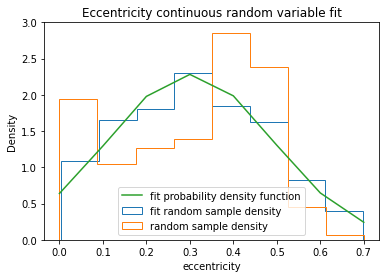

In [193]:
_, ax = plt.subplots()
ax.set_title(r"Eccentricity continuous random variable fit")
ax.hist(fit_sample_close, density=True, histtype='step', bins=len(x_close), label='fit random sample density')
ax.hist(sample_close, density=True, histtype='step', bins=len(x_close), label='random sample density')
ax.plot(x_close, y_close_pdf, '-', label='fit probability density function')
ax.set_xlabel('eccentricity')
ax.set_ylabel('Density')
ax.legend()
plt.show()

*All generated values in sample must be in interval [0, .7]*

In [194]:
all(v >= x_close.min() and v <= x_close.max() for v in fit_sample_close)

True

### Very close separation modifier
*Fitting a truncated exponential distribution*

In [217]:
upper, lower = x_very_close.max(), x_very_close.min()
mu = lower
sigma = np.std(sample_very_close)
b = (upper - lower) / sigma

b, mu, sigma

(3.3675484927948784, 0.0, 0.1781711536697229)

In [207]:
from scipy.stats import truncexpon

dist_very_close = truncexpon(b, mu, sigma)
r = kstest(sample_very_close, [b, mu, sigma], 'truncexpon')
r

KstestResult(statistic=0.3333333333333333, pvalue=0.7797675963000349)

*Density function from the fitted continuous random variable*

In [209]:
y_very_close_pdf =  [dist_very_close.pdf(xi) for xi in x_very_close]

*Creating random sample of 1000 elements from the fitted continuous random variable*

In [210]:
fit_sample_very_close = dist_very_close.rvs(size=1000)

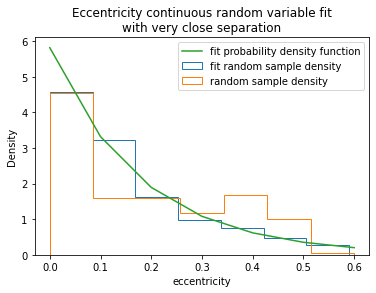

In [216]:
_, ax = plt.subplots()
ax.set_title(r"""Eccentricity continuous random variable fit
with very close separation""")
ax.hist(fit_sample_very_close, density=True, histtype='step', bins=len(x_very_close), label='fit random sample density')
ax.hist(sample_very_close, density=True, histtype='step', bins=len(x_very_close), label='random sample density')
ax.plot(x_very_close, y_very_close_pdf, '-', label='fit probability density function')
ax.set_xlabel('eccentricity')
ax.set_ylabel('Density')
ax.legend()
plt.show()